In [36]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

In [32]:
# Parameters
J = 1.0    # Coupling strength
t = np.pi  # Evolution time (try pi/2 for full swap)

# Initialize circuit
qc_2spin = QuantumCircuit(2)
qc_2spin.x(0)  # Prepare |01> state (anti-aligned spins)

# Exact time evolution gates
qc_2spin.rxx(2 * J * t, 0, 1)  # X0X1 term
qc_2spin.ryy(2 * J * t, 0, 1)  # Y0Y1 term
qc_2spin.rzz(2 * J * t, 0, 1)  # Z0Z1 term

# Measure
qc_2spin.measure_all()

# Simulate
simulator = AerSimulator()
result = simulator.run(qc_2spin, shots=1000).result()
counts = result.get_counts()
print("2-Spin Results:", counts)

2-Spin Results: {'01': 1000}


In [33]:
qc_3spin = QuantumCircuit(3)
qc_3spin.x([0, 2])  # Prepare |010> state

# Apply exact evolution to each pair
t_pair = t / 2  # Adjust time for pairwise interactions
for i, j in [(0, 1), (1, 2)]:  # Nearest-neighbor pairs
    qc_3spin.rxx(2 * J * t_pair, i, j)
    qc_3spin.ryy(2 * J * t_pair, i, j)
    qc_3spin.rzz(2 * J * t_pair, i, j)

qc_3spin.measure_all()
result = simulator.run(qc_3spin, shots=1000).result()
print("3-Spin Results:", result.get_counts())

3-Spin Results: {'101': 1000}


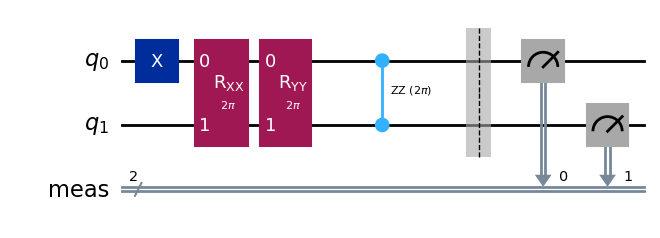

In [34]:
qc_2spin.draw('mpl')  # Show circuit diagram

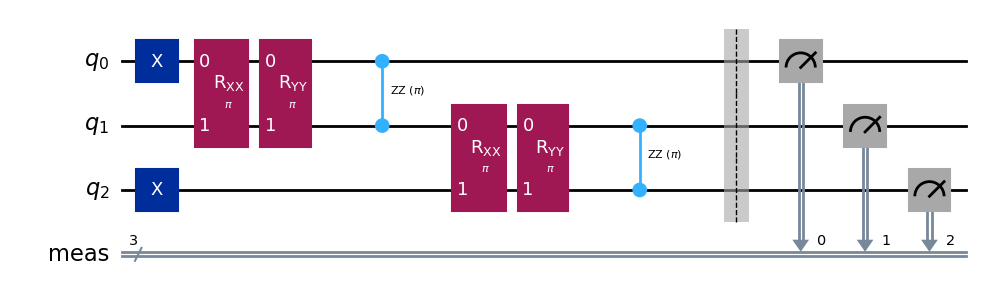

In [35]:
qc_3spin.draw('mpl')  # Show circuit diagram

In [ ]:

"""
Difference 
In a 2-spin Heisenberg model, there are only two interacting spins. 
The system's dynamics are governed by a Hamiltonian that includes interactions between these two spins
in all three spatial directions (x, y, and z).
Because there are only two spins, the possible quantum states are limited to four configurations: both up, both down, or one up and one down. 
The interactions are direct and simple — the system can exhibit entanglement between these two spins, 
and we can study how they exchange quantum information over time.

In a 3-spin Heisenberg model, there are three interacting spins. 
Now, the dynamics become richer and more complex because there are multiple pairs of spins interacting: 
typically between spin 0 and spin 1, and between spin 1 and spin 2.(optionally between spin 0 and spin 2 too)
With three spins, there are eight possible quantum configurations instead of four, 
and the system can exhibit more complex patterns of entanglement and correlations. 
Here, one spin can indirectly influence another by interacting through the intermediate spin, which isn’t possible in a two-spin model.
"""
